In [7]:
!pip install -q gdown

In [6]:
!gdown --id 1pcWHu1Ubaf5bldw74rx2yiuFHdE7kV4w -O arducam_img.png

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1pcWHu1Ubaf5bldw74rx2yiuFHdE7kV4w
To: /content/arducam_img.png
100% 33.6k/33.6k [00:00<00:00, 48.4MB/s]


In [35]:
!pip install -q imageio

Load the image captured by the Arducam camera and see the image size, data type and what an image looks like.

image size = (200, 320)
image data type = uint8
[[ 44  44  43 ... 146 145 146]
 [ 46  44  45 ... 142 147 146]
 [ 45  45  43 ... 144 144 146]
 ...
 [ 71  71  71 ... 141 126 103]
 [ 70  71  68 ... 109 103  97]
 [ 70  70  69 ...  99  99  94]]


(np.float64(-0.5), np.float64(319.5), np.float64(199.5), np.float64(-0.5))

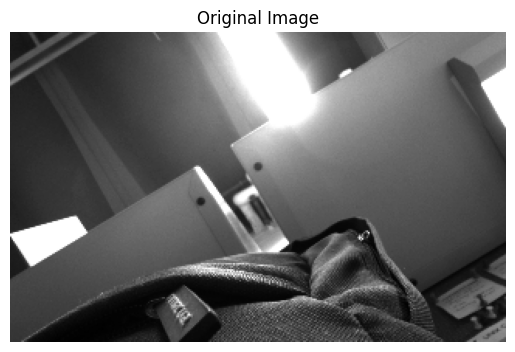

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread

img = imageio.imread("/content/arducam_img.png")
print(f'image size = {img.shape}')
print(f'image data type = {img.dtype}')
print(img)

plt.figure(1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis("off")

Plot the histogram of the intensity of the entire image.

Text(0.5, 1.0, 'Image intensity histogram')

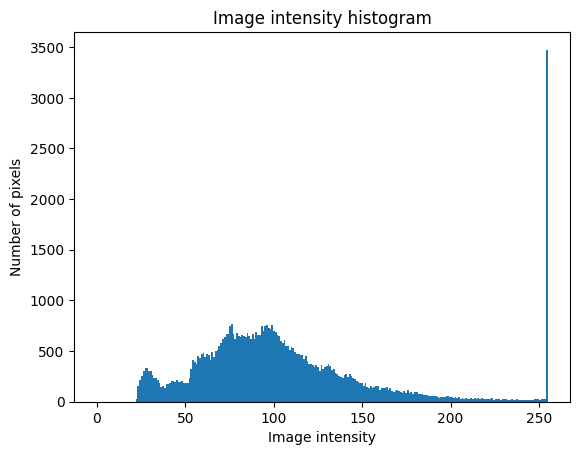

In [15]:
# Show histogram
plt.figure(2)
plt.hist(img.ravel(), bins=256, range=(0, 255))
plt.xlabel("Image intensity")
plt.ylabel("Number of pixels")
plt.title("Image intensity histogram")

Let's load another image captured by the Arducam camera with lower exposure rate. It's image intensity distribution should be shifted towards the left (darkness).

In [17]:
!gdown --id 1Af3hVxtzZt071Fvoz--eNjv1emXsROVi -O arducam_img_low_exposure.png

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Af3hVxtzZt071Fvoz--eNjv1emXsROVi
To: /content/arducam_img_low_exposure.png
100% 21.4k/21.4k [00:00<00:00, 35.6MB/s]


Text(0.5, 1.0, 'Image intensity histogram')

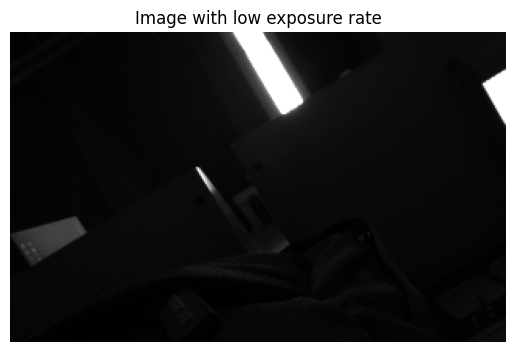

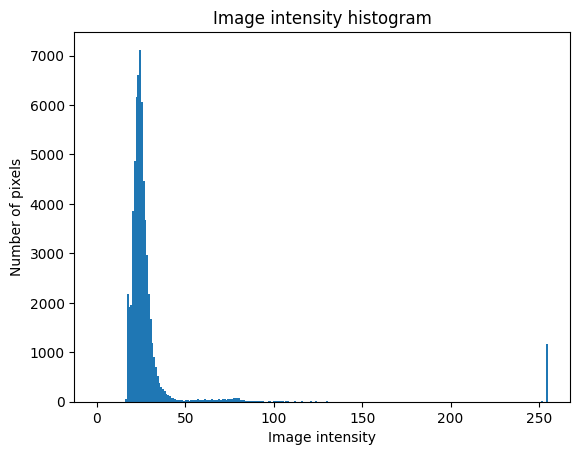

In [22]:
img_low_exp = imageio.imread("/content/arducam_img_low_exposure.png")
plt.figure(3)
plt.imshow(img_low_exp, cmap='gray')
plt.title("Image with low exposure rate")
plt.axis("off")

plt.figure(4)
plt.hist(img_low_exp.ravel(), bins=256, range=(0, 255))
plt.xlabel("Image intensity")
plt.ylabel("Number of pixels")
plt.title("Image intensity histogram")

Let's increase the brightness by scaling up the intensity of each pixel. By doing so, a lot of image details can now be observed.

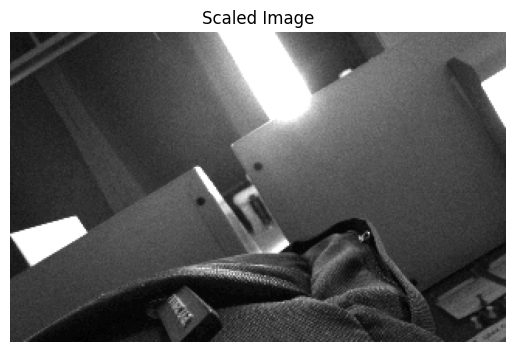

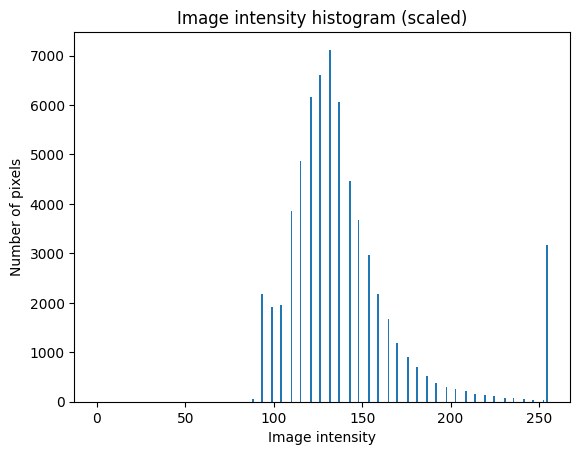

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
# Convert to float
img_low_exp_scaled = img_low_exp.astype(np.float64)

# Scale up the image intensities
img_low_exp_scaled = img_low_exp_scaled * 5.5

# Clip values > 255
img_low_exp_scaled = np.clip(img_low_exp_scaled, 0, 255)

# Convert back to uint8
img_low_exp_scaled = img_low_exp_scaled.astype(np.uint8)

# Show processed image
plt.figure(3)
plt.imshow(img_low_exp_scaled, cmap='gray')
plt.title("Scaled Image")
plt.axis("off")

# Histogram of processed image
plt.figure(4)
plt.hist(img_low_exp_scaled.ravel(), bins=256, range=(0, 255))
plt.xlabel("Image intensity")
plt.ylabel("Number of pixels")
plt.title("Image intensity histogram (scaled)")

plt.show()

Let's load another image.

In [30]:
!gdown --id 1njoW7Riq1lvrSlnOpjRoVYIHdt6ExEVN -O img_cam_man.png

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1njoW7Riq1lvrSlnOpjRoVYIHdt6ExEVN
To: /content/img_cam_man.png
100% 38.3k/38.3k [00:00<00:00, 42.8MB/s]


Plotting the image intensity distribution reveals that there are two "peaks".

Text(0.5, 1.0, 'Image intensity histogram')

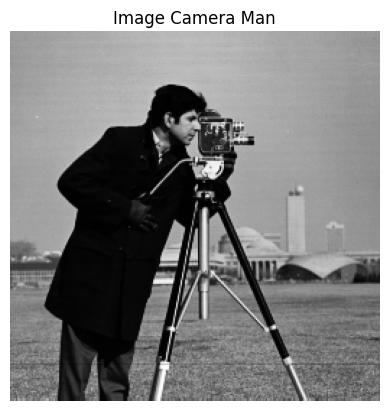

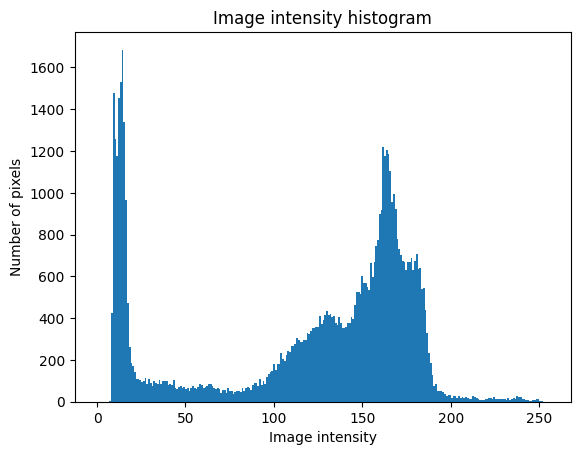

In [31]:
img_cam_man = imageio.imread("/content/img_cam_man.png")
plt.figure(3)
plt.imshow(img_cam_man, cmap='gray')
plt.title("Image Camera Man")
plt.axis("off")

plt.figure(4)
plt.hist(img_cam_man.ravel(), bins=256, range=(0, 255))
plt.xlabel("Image intensity")
plt.ylabel("Number of pixels")
plt.title("Image intensity histogram")

We can choose a value (threshold) that splits the two peaks from the distribution: image pixels whose intensities are lower than the threshold would become 0 and 255 otherwise. In the end, we get a binarized image.

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

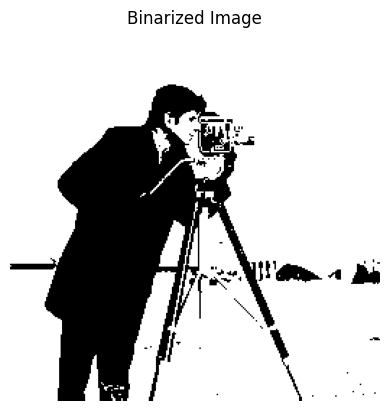

In [32]:
b_img_cam_man = img_cam_man.astype(np.float64)

thresh = 70
for i in range(b_img_cam_man.shape[0]):
    for j in range(b_img_cam_man.shape[1]):
        if b_img_cam_man[i, j] < thresh:
            b_img_cam_man[i, j] = 0
        else:
            b_img_cam_man[i, j] = 255

b_img_cam_man = b_img_cam_man.astype(np.uint8)

# Alternative approach:
# b_img_cam_man = np.where(b_img_cam_man < 70, 0, 255).astype(np.uint8)

plt.figure(5)
plt.imshow(b_img_cam_man, cmap='gray')
plt.title("Binarized Image")
plt.axis("off")